Merging all parquets to one

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import glob
import joblib
import gc
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_sample_weight
import xgboost as xgb


df_list = []
counter=1
for file in glob.glob('/content/drive/MyDrive/Xcandıs/*.parquet'):


    try:
        temp_df = pd.read_parquet(file)

        float_cols = temp_df.select_dtypes(include=['float64']).columns
        temp_df[float_cols] = temp_df[float_cols].astype('float32')

        object_cols = temp_df.select_dtypes(include=['object']).columns


        print("dosya işleniyor",counter)
        counter=counter+1
        df_list.append(temp_df)
        del temp_df
        gc.collect()
    except Exception as e:
        print(f"  Hata! {file} işlenemedi: {str(e)}")
        continue

if df_list:
    print("\nTüm dosyalar okundu, birleştirme yapılıyor...")
    df = pd.concat(df_list, ignore_index=True)
    df_list=[]
    del df_list
    gc.collect()

    print(f"\nFinal DataFrame boyutu: {df.shape}")
    print("Veri tipleri:")
    print(df.dtypes)
    print(f"Toplam bellek kullanımı: {df.memory_usage(deep=True).sum()/1024**2:.2f} MB")
else:
    raise ValueError("Hiçbir parquet dosyası okunamadı!")

print("\nKategorik sütun işleme başlıyor...")
non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()

if non_numeric_cols:
    print(f"İşlenecek kategorik sütunlar: {non_numeric_cols}")
    label_encoders = {}

    for col in non_numeric_cols:
        if col != 'label':
            print(f"  {col} sütunu dönüştürülüyor...")
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            label_encoders[col] = le
else:
    print("İşlenecek kategorik sütun bulunamadı")


X = df.drop('label', axis=1)
y = df['label']
df=pd.DataFrame()
del df
gc.collect()
print("\ntest ayırma")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
y=pd.DataFrame()
indexX=X.columns
X=pd.DataFrame()

XGBclassifier = xgb.XGBClassifier(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=6
)
XGBclassifier.fit(X_train, y_train)
xgb_pred = XGBclassifier.predict(X_test)


joblib.dump(XGBclassifier, 'xgb_model.joblib')
print('Accuracy:', accuracy_score(y_test, xgb_pred))
conf_matrix = confusion_matrix(y_test, xgb_pred)
correctNumberOfPredictionOfTheFirstClass = conf_matrix[0, 0]
falseNumberOfPredictionTheSecondClass = conf_matrix[0, 1]
falseNumberOfPredictionTheFirstClass = conf_matrix[1, 0]
correctNumberOfPredictionOfTheSecondClass = conf_matrix[1, 1]

Sensitivity=correctNumberOfPredictionOfTheFirstClass/float((correctNumberOfPredictionOfTheFirstClass+falseNumberOfPredictionTheFirstClass))
print("\nSensitivity :",Sensitivity)
Specificity=correctNumberOfPredictionOfTheSecondClass/float((correctNumberOfPredictionOfTheSecondClass+falseNumberOfPredictionTheSecondClass))
print("\nSpecificity  :",Specificity)
print('\nClassification Report:\n', classification_report(y_test, xgb_pred))

feature_importances = pd.Series(XGBclassifier.feature_importances_, index=indexx)
top_features = feature_importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_features.sort_values().plot(kind='barh', color='darkorange')
plt.title('XGBoost - En Önemli 20 Özellik', fontsize=14)
plt.xlabel('Önem Skoru', fontsize=12)
plt.ylabel('Özellikler', fontsize=12)
plt.tight_layout()
plt.savefig('xgboost_feature_importance.png', dpi=300)
plt.show()
with open("top_featuresXGBBoost.txt", "w", encoding="utf-8") as f:
    for feature, importance in top_features.items():
        f.write(f"{feature}: {importance:.6f}\n")

dosya işleniyor 1
dosya işleniyor 2
dosya işleniyor 3
dosya işleniyor 4
dosya işleniyor 5
dosya işleniyor 6
dosya işleniyor 7
dosya işleniyor 8
dosya işleniyor 9
dosya işleniyor 10
dosya işleniyor 11
dosya işleniyor 12
dosya işleniyor 13
dosya işleniyor 14
dosya işleniyor 15
dosya işleniyor 16
dosya işleniyor 17
dosya işleniyor 18
dosya işleniyor 19
dosya işleniyor 20
dosya işleniyor 21
dosya işleniyor 22
dosya işleniyor 23
dosya işleniyor 24
dosya işleniyor 25
dosya işleniyor 26
dosya işleniyor 27
dosya işleniyor 28
dosya işleniyor 29
dosya işleniyor 30
dosya işleniyor 31
dosya işleniyor 32
dosya işleniyor 33
dosya işleniyor 34
dosya işleniyor 35
dosya işleniyor 36
dosya işleniyor 37
dosya işleniyor 38
dosya işleniyor 39
dosya işleniyor 40
dosya işleniyor 41
dosya işleniyor 42
dosya işleniyor 43
dosya işleniyor 44
dosya işleniyor 45
dosya işleniyor 46
dosya işleniyor 47
dosya işleniyor 48
dosya işleniyor 49
dosya işleniyor 50
dosya işleniyor 51
dosya işleniyor 52
dosya işleniyor 53
do

features>0 (Seq without Repl) XGBoost

Sayısal Olmayan Sütunlar: []
veri ön işleme başladı breakpoint
test ayırımı
model oluşturma
Accuracy: 0.9574459711085898

Sensitivity : 1.0

Specificity  : 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368414
           1       0.90      0.80      0.85     99885
           2       1.00      0.98      0.99     65279
           3       0.83      0.90      0.86    101625
           4       0.96      1.00      0.98    101625

    accuracy                           0.96    736828
   macro avg       0.94      0.94      0.94    736828
weighted avg       0.96      0.96      0.96    736828



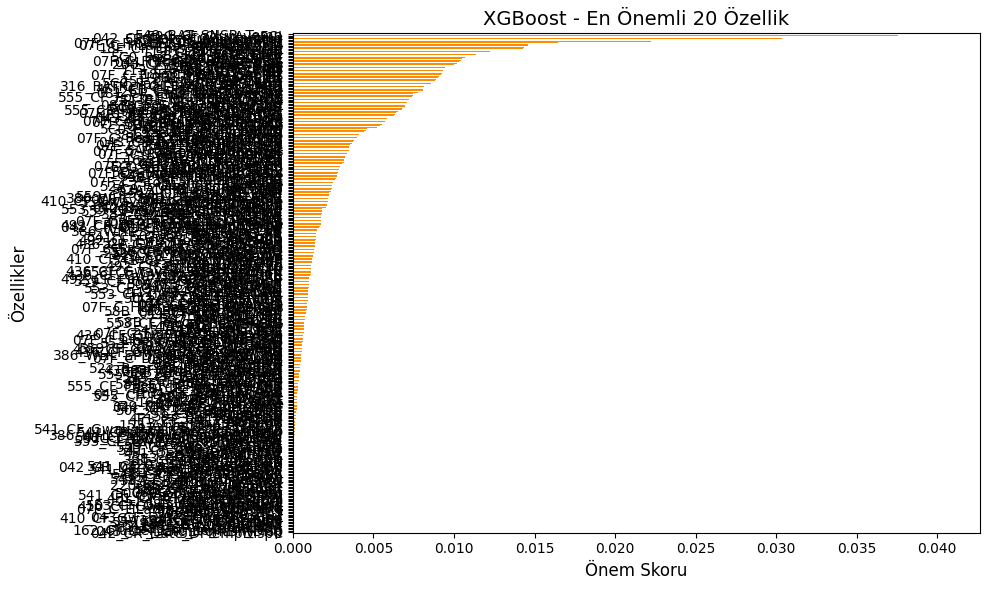

In [ ]:



import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_sample_weight
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import dask.dataframe as dd

selected_features = [
"549_BAT_SNSR_Temp",
"5B0_CF_Clu_Odometer",
"042_CF_Datc_CO2_Warning",
"111_TEMP_AT",
"5FA_CR_Wcs_ErrStat",
"251_CF_Mdps_ToiFlt",
"383_CF_Fatc_BlwrOn",
"18F_CF_Ems_EngRunNorm",
"111_TCU_TYPE",
"044_CR_Datc_OutTempF",
"113_CF_Tcu_IsgInhib",
"07F_C_RearEXTTailLhOpenSts",
"316_SWI_IGK",
"387_WHL_DIR_FL",
"112_N_TC_RAW",
"47F__4WD_CLU_LIM",
"260_ENG_STAT",
"316_ACK_TCS",
"4F1_CF_Clu_CruiseSwState",
"080_TQ_STND",
"200_CF_Ems_PumpTPres",
"260_SOAK_TIME",
"07F_C_RearFOGLhOpenSts",
"2B0_SAS_Stat",
"111_N_TC",
"113_CR_Tcu_IsgTgtRPM",
"381_CF_Mdps_Flex",
"387_WHL_DIR_FR",
"18F_CF_Ems_IsgStat",
"316_RATIO_TQI_BAS_MAX_STND",
"329_TQ_STND",
"043_CF_Datc_PwrInf",
"387_WHL_DIR_RL",
"329_CAN_VERS",
"111_GEAR_TYPE",
"383_CF_FATC_Iden",
"386_WHL_SPD_RR",
"18F_SLD_VS",
"383_CR_Fatc_TqAcnOut",
"251_CF_Mdps_ToiActive",
"081_CF_Ems_EngOperStat",
"251_CF_Mdps_SErr",
"081_CR_Ems_SoakTimeExt",
"07F_C_FrontFOGRhOpenSts",
"387_WHL_DIR_RR",
"50C_CF_Clu_AvgFCI",
"112_ETL_TCU",
"4F1_CF_Clu_RheostatLevel",
"383_CR_Fatc_OutTemp",
"555_CF_Fpcm_LPPumpDiscShort",
"07F_C_HLampHighLhOpenSts",
"5C0_Pas_Spkr_Rlh_Alarm",
"381_CF_Mdps_WLmp",
"47F__4WD_TQC_LIM",
"383_CF_Fatc_Compload",
"5D3_HU_PhoneActivity",
"381_CF_Mdps_CurrMode",
"251_CF_Mdps_ToiUnavail",
"52A_CF_Clu_InhibitD",
"5C0_Pas_Spkr_Fcnt_Alarm",
"316_TQFR",
"07F_C_FrontEXTTailRhOpenSts",
"07F_C_HMSLOpenSts",
"555_CF_Fpcm_PreSnrSigErr",
"043_CF_Datc_ModDisp",
"555_CF_Fpcm_LP_System_Error",
"251_CR_Mdps_StrColTq",
"112_SPK_RTD_TCU",
"5C0_Pas_Spkr_Flh_Alarm",
"080_TQFR",
"043_CF_Datc_RearModDisp",
"111_G_SEL_DISP",
"07F_C_RearTSIGLhOpenSts",
"07F_C_SBendingRhOpenSts",
"5C0_Pas_Spkr_Rcnt_Alarm",
"220_CYL_PRES",
"555_CF_Fpcm_LPCtrCirFlt",
"381_CF_Mdps_Stat",
"5C0_Pas_Spkr_Rrh_Alarm",
"260_AliveCounter",
"07F_C_FrontTSIGRhOpenSts",
"07F_C_HLampLowLhOpenSts",
"549_BAT_SOF",
"5D3_HU_VRActivity",
"57F_HU_Type",
"545_TEMP_FUEL",
"381_CR_Mdps_DrvTq",
"5C0_Pas_Spkr_Frh_Alarm",
"043_CF_Datc_RearBlwDisp",
"251_CR_Mdps_OutTq",
"5A0_CF_Acu_NumOfFlt",
"113_N_TGT_LUP",
"58B_CF_Rcta_Stat",
"07F_C_StopLampLhOpenSts",
"559_CF_Gway_AstSeatBeltInd",
"07F_C_StopLampRhOpenSts",
"52A_CF_Clu_LanguageInfo",
"587_CF_Tmu_TempSet",
"54C_Vehicle_Stop_Time",
"07F_C_SBendingLhOpenSts",
"162_Clutch_Driving_Tq",
"112_CF_Tcu_Alive",
"522_C_RKECMD",
"07F_C_FrontEXTTailLhOpenSts",
"557_PID_08h",
"410_CF_Gway_DrLockSoundRValue",
"5D3_BlowerNoiseControl",
"18F_R_NEngIdlTgC",
"111_CF_Tcu_Alive1",
"042_CR_Datc_RearDrTempDispF",
"547_CTR_IG_CYC_OBD",
"5C0_Audio_VolumeDown",
"111_SWI_CC",
"492_CF_Ems_ChecksumEMS9",
"492_CF_Ems_ModeledAmbTemp",
"381_CF_Mdps_Type",
"042_CR_Datc_DrTempDispF",
"541_CF_Gway_IGNSw",
"52A_CF_Clu_HudInfoSet",
"07F_C_DRLLampRhOpenSts",
"081_CR_Ems_IndAirTemp",
"07F_C_RearEXTTailRhOpenSts",
"260_SPK_TIME_CUR",
"520_CR_Photosensor_RH",
"50C_CF_Clu_TripUnit",
"2B0_SAS_Speed",
"553_CF_Gway_SJBDeliveryMode",
"593_STATUS_TPMS",
"556_PID_04h",
"162_Cluster_Engine_RPM",
"555_CR_Fpcm_LPActPre",
"559_CF_Gway_RLSeatBeltInd",
"386_WHL_SPD_FR",
"545_VB",
"043_CF_Datc_PSModDisp",
"559_CF_Gway_RCSeatBeltInd",
"58B_CF_Lca_Stat",
"410_CF_Gway_PSMRValue",
"386_WHL_SPD_RL",
"545_EMS_VS",
"593_PRESSURE_FR",
"52A_CF_Clu_VehicleSpeed",
"553_CF_Gway_SMKDispWarn",
"383_CR_Fatc_OutTempSns",
"507_AVH_CLU",
"329_MUL_CODE",
"547_IntAirTemp",
"080_N",
"436_CF_Gway_PASDisplayRCTR",
"502_CF_Tcu_DriWarn1",
"386_WHL_SPD_Checksum_MSB",
"490_EPB_CLU",
"043_CF_Datc_OpSts",
"153_TQI_TCS",
"500_CF_TTL_Ind",
"520_CR_Photosensor_LH",
"553_CF_Gway_SMKFobID",
"111_CF_Tcu_ChkSum1",
"436_CF_Gway_PASDisplayFCTR",
"044_CF_Datc_VerMaj",
"541_CF_Gway_WiperIntT",
"492_CF_Ems_DecelReq",
"557_PID_23h",
"557_PID_07h",
"18F_R_PAcnC",
"436_CF_Gway_PASDisplayRLH",
"553_CF_Gway_CLUSwGuiCtrl",
"556_PID_0Ch",
"153_TQI_SLW_TCS",
"436_CF_Gway_PASDisplayFLH",
"492_CR_Ems_EngOilTemp",
"541_CF_Gway_RainSnsState",
"559_CF_Gway_DrvSeatBeltInd",
"316_N",
"492_CF_Ems_AliveCounterEMS9",
"410_CF_Gway_AutoLightRValue",
"113_CF_Tcu_Alive3",
"164_CF_Esc_CtrMode",
"386_WHL_SPD_FL",
"556_PID_11h",
"07F_C_LicensePlateRhOpenSts",
"07F_C_HLampLowRhOpenSts",
"502_CF_TCU_WarnMsg",
"200_FCO",
"58B_CF_RCTA_IndBriLeft",
"111_TQI_TCU_INC",
"5A0_CF_Acu_Dtc",
"593_TPMS_W_LAMP",
"547_FA_PV_CAN",
"522_C_CountryCfg",
"541_CF_Gway_RKECmd",
"556_PID_03h",
"386_WHL_SPD_Checksum_LSB",
"329_ENG_VOL",
"316_TQI_ACOR",
"553_CF_Gway_BCMRKEID",
"58B_CF_Lca_IndBriRight",
"58B_CF_RCTA_IndBriRight",
"556_PID_05h",
"436_CF_Gway_PASDisplayFRH",
"50C_CF_Clu_AltLStatus",
"547_CTR_CDN_OBD",
"07F_C_FrontTSIGLhOpenSts",
"553_CF_Gway_CountryCfg",
"387_WHL_PUL_RL",
"58B_CF_Lca_IndBriLeft",
"436_CF_Gway_PASDisplayRRH",
"47F_ROL_CNT_ESP",
"387_WHL_PUL_FL",
"547_STATE_DC_OBD",
"436_CF_Gway_PASFsound",
"329_CONF_TCU",
"386_WHL_SPD_AliveCounter_LSB",
"556_PID_0Dh",
"559_CF_Gway_RRSeatBeltInd",
"07F_C_FrontFOGLhOpenSts",
"490_EPB_FORCE",
"329_CLU_ACK",
"387_WHL_PUL_FR",
"557_PID_06h",
"113_SLOPE_TCU",
"593_UNIT",
"555_CF_Fpcm_LPPumpOverCur",
"387_WHL_PUL_Chksum",
"07F_C_LicensePlateLhOpenSts",
"081_CF_Ems_Alive2",
"522_C_IGNSW",
"316_VS",
"044_CF_Datc_VerMin",
"18F_R_TqAcnApvC",
"080_TQI",
"500_CF_SBR_Ind",
"153_TQI_MSR",
"593_TREAD_W_LAMP",
"500_CF_SWL_Ind",
"4F1_CF_Clu_Vanz",
"387_WHL_PUL_RR",
"541_CF_Gway_LightSwState",
"555_CF_Fpcm_PreSnrShort",
"522_RearSW_RSELockOnOff",
"042_CR_Datc_RearDrTempDispC",
"07F_C_DRLLampLhOpenSts",
"593_PRESSURE_RR",
"2B0_MsgCount",
"220_YAW_RATE",
"547_ECGPOvrd",
"4F1_CF_Clu_AliveCnt1",
"329_TPS",
"251_CR_Mdps_StrTq",
"044_CR_Datc_OutTempC",
"220_LAT_ACCEL",
"113_CF_Tcu_ShfPatt",
"111_SWI_GS",
"545_BAT_Alt_FR_Duty",
"381_CR_Mdps_StrAng",
"50C_CF_Clu_FuelDispLvl",
"553_CF_Gway_IntTailAct",
"553_CF_Gway_SMKRKECmd",
"549_BAT_SOC",
"553_CF_Gway_WngBuz",
"164_CF_Esc_Chksum",
"164_CF_Esc_AliveCnt",
"52A_CF_Clu_InhibitN",
"557_PID_0Bh",
"080_CF_Ems_Alive",
"553_CF_Gway_AutoLightValue",
"112_VS_TCU",
"18F_TQI_B",
"316_PUC_STAT",
"541_CF_Gway_PassiveAccessUnlock",
"113_CF_Tcu_ChkSum3",
"044_CF_Datc_Type",
"549_BAT_SNSR_I",
"4F1_CF_Clu_ParityBit1",
"112_CF_Tcu_ChkSum",
"044_CF_Datc_IncarTemp",
"329_MAF_FAC_ALTI_MMV",
"386_WHL_SPD_AliveCounter_MSB",
"553_CF_Gway_ExtTailAct",
"042_CR_Datc_PsTempDispF",
"260_TQI_MAX",
"50C_CF_Clu_AliveCnt2",
"541_CF_Gway_Ign2",
"153_CheckSum_TCS1",
"593_PRESSURE_RL",
"4F1_CF_Clu_DetentOut",
"553_CF_Gway_AvTail",
"5FA_CR_Wcs_ClassStat",
"541_CF_Gway_HoodSw",
"260_TQI_MIN",
"113_CF_Tcu_TarGr",
"2B0_SAS_Angle",
"220_ESP12_Checksum",
"541_CF_Gway_DrvSeatBeltSw",
"541_CF_Gway_AstSeatBeltSw",
"329_TEMP_ENG",
"383_CF_Fatc_ChkSum",
"260_TQI_TARGET",
"080_TQI_ACOR",
"220_LONG_ACCEL",
"410_CF_Gway_RearWiperRValue",
"593_PRESSURE_FL",
"080_PV_AV_CAN",
"47F_REQ_EPB_ACT",
"541_CF_Gway_ParkBrakeSw",
"329_BRAKE_ACT",
"50C_CF_Clu_DrivingModeSwi",
"081_BRAKE_ACT",
"081_CF_Ems_ChkSum2",
"329_PV_AV_CAN",
"260_Checksum",
"541_CF_Gway_DrvDrSw",
"541_CF_Gway_HeadLampLow",
"47F_AVH_STAT",
"111_TQI_TCU",
"07F_C_HLampHighRhOpenSts",
"58B_CF_Lca_IndRight",
"541_CF_Gway_HazardSw",
"383_CF_Fatc_MsgCnt",
"043_CF_Datc_TempDispUnit",
"381_CF_Mdps_Chksum",
"587_CF_Tmu_AliveCnt1",
"251_CF_Mdps_MsgCount2",
"549_BAT_SNSR_V",
"381_CF_Mdps_AliveCnt",
"112_VS_TCU_DECIMAL",
"220_ESP12_AliveCounter",
"2B0_CheckSum",
"260_TQI",
"383_CF_Fatc_AcnCltEnRq",
"251_CF_Mdps_Chksum2",
"4F1_CF_Clu_VanzDecimal",
"541_CF_Gway_TurnSigLh",
"153_AliveCounter_TCS1",
"50C_CF_Clu_EcoDriveInf",
"080_CF_Ems_ChkSum",
"112_N_INC_TCU",
"162_Cluster_Engine_RPM_Flag",
"58B_CF_Lca_IndLeft",
"043_CF_Datc_FrontBlwDisp",
"553_CF_Gway_IPMDiagState",
"410_CF_Gway_MoodLpRValue",
"042_CR_Datc_DrTempDispC","label"
]

df = pd.read_parquet('/content/drive/MyDrive/XCANDIS RAW/secili_siraliveri.parquet', columns=selected_features)

non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Sayısal Olmayan Sütunlar:", non_numeric_cols)

label_encoders = {}
for col in non_numeric_cols:
    if col not in ['label']:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

print("veri ön işleme başladı breakpoint")
X = df.drop(['label'], axis=1)
y = df['label']
df=pd.DataFrame()
del df
gc.collect()
print("test ayırımı")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
sample_weights = compute_sample_weight('balanced', y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
y=pd.DataFrame()
indexX=X.columns
X=pd.DataFrame()
print("model oluşturma")
XGBclassifier = xgb.XGBClassifier(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=6
)
XGBclassifier.fit(X_train, y_train)
xgb_pred = XGBclassifier.predict(X_test)

print('Accuracy:', accuracy_score(y_test, xgb_pred))

conf_matrix = confusion_matrix(y_test, xgb_pred)
correctNumberOfPredictionOfTheFirstClass = conf_matrix[0, 0]
falseNumberOfPredictionTheSecondClass = conf_matrix[0, 1]
falseNumberOfPredictionTheFirstClass = conf_matrix[1, 0]
correctNumberOfPredictionOfTheSecondClass = conf_matrix[1, 1]

Sensitivity=correctNumberOfPredictionOfTheFirstClass/float((correctNumberOfPredictionOfTheFirstClass+falseNumberOfPredictionTheFirstClass))
print("\nSensitivity :",Sensitivity)
Specificity=correctNumberOfPredictionOfTheSecondClass/float((correctNumberOfPredictionOfTheSecondClass+falseNumberOfPredictionTheSecondClass))
print("\nSpecificity  :",Specificity)
print('\nClassification Report:\n', classification_report(y_test, xgb_pred))

feature_importances = pd.Series(XGBclassifier.feature_importances_, index=indexX)
top_features = feature_importances.sort_values(ascending=False).head(670)

plt.figure(figsize=(10, 6))
top_features.sort_values().plot(kind='barh', color='darkorange')
plt.title('XGBoost - En Önemli 20 Özellik', fontsize=14)
plt.xlabel('Önem Skoru', fontsize=12)
plt.ylabel('Özellikler', fontsize=12)
plt.tight_layout()
plt.savefig('xgboost_feature_importance.png', dpi=300)
plt.show()

with open("siraliveri_top_featuresXGBBoost.txt", "w", encoding="utf-8") as f:
    for feature, importance in top_features.items():
        f.write(f"{feature}: {importance:.6f}\n")


ALL DATA ALL FEATURE XGBoost

In [ ]:
import pyarrow.parquet as pq
import pyarrow as pa
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import gc
from joblib import dump, load
import os

table = pq.read_table('/content/drive/MyDrive/tumdatabirlesik.parquet')

non_numeric_cols = [field.name for field in table.schema
                   if pa.types.is_string(field.type) or pa.types.is_dictionary(field.type)]
print("Sayısal Olmayan Sütunlar:", non_numeric_cols)

label_encoders = {}
for col in non_numeric_cols:
    if col != 'label':
        unique_values = table.column(col).unique().to_pylist()
        le = LabelEncoder()
        le.fit([str(x) for x in unique_values])
        encoded = le.transform(table.column(col).to_pandas().astype(str))
        table = table.set_column(
            table.schema.get_field_index(col),
            col,
            pa.array(encoded)
        )
        label_encoders[col] = le

X_table = table.drop(['label'])
y_array = table.column('label').to_numpy()

indices = np.arange(len(y_array))
train_idx, test_idx = train_test_split(
    indices, test_size=0.2, random_state=42, stratify=y_array
)

feature_names = [field.name for field in X_table.schema]

dtrain = xgb.DMatrix(
    data=X_table.take(train_idx).to_pandas()[feature_names],
    label=y_array[train_idx],
    feature_names=feature_names
)

dtest = xgb.DMatrix(
    data=X_table.take(test_idx).to_pandas()[feature_names],
    label=y_array[test_idx],
    feature_names=feature_names
)

params = {
    'objective': 'multi:softmax',
    'n_estimators': 100,
    'reg_lambda': 1,
    'gamma': 0,
    'max_depth': 6,
    'tree_method': 'hist'
}

model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=10,
    verbose_eval=10
)

xgb_pred = model.predict(dtest)
xgb_pred_labels = (xgb_pred > 0.5).astype(int)

print('Accuracy:', accuracy_score(y_array[test_idx], xgb_pred_labels))
print('\nClassification Report:\n', classification_report(y_array[test_idx], xgb_pred_labels))
model_dir = "/content/drive/MyDrive/"
os.makedirs(model_dir, exist_ok=True)

dump(model, os.path.join(model_dir, 'xgboost_model.joblib'))

xgb_importances = model.get_score(importance_type='weight')
feature_importances = pd.Series(xgb_importances).sort_values(ascending=False)

top_features = feature_importances.head(680)

with open("/content/drive/MyDrive/tumveri_top_featuresXGBBoost.txt", "w", encoding="utf-8") as f:
    for feature, importance in feature_importances.items():
        f.write(f"{feature}: {importance:.6f}\n")

del table, X_table, dtrain, dtest
gc.collect()

Sayısal Olmayan Sütunlar: ['112_CUR_GR']


RFC SEQ WITH REPL ALL FEATURES

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

df = pd.read_parquet('/content/drive/MyDrive/XCANDIS RAW/secili_siraliveriV2.parquet', engine='pyarrow')

non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()

if non_numeric_cols:
    print(f"İşlenecek kategorik sütunlar: {non_numeric_cols}")
    label_encoders = {}
    for col in non_numeric_cols:
        if col != 'label':
            print(f"  {col} sütunu dönüştürülüyor...")
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            label_encoders[col] = le
else:
    print("İşlenecek kategorik sütun bulunamadı")

X = df.drop(['label'], axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("\n--- Accuracy ---")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\n--- Confusion Matrix ---")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.title('Confusion Matrix - Random Forest')
plt.show()

İşlenecek kategorik sütunlar: ['112_CUR_GR']
  112_CUR_GR sütunu dönüştürülüyor...


XGB BINARY MODEL TEST

2
İşlenecek kategorik sütunlar: ['112_CUR_GR']
  112_CUR_GR sütunu dönüştürülüyor...
<class 'xgboost.sklearn.XGBClassifier'>

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      0.12      0.21    348021
           1       0.13      1.00      0.22     44366

    accuracy                           0.22    392387
   macro avg       0.56      0.56      0.22    392387
weighted avg       0.90      0.22      0.22    392387


--- Accuracy ---
Test Accuracy: 0.2194

--- Confusion Matrix ---
[[ 41725 306296]
 [     0  44366]]


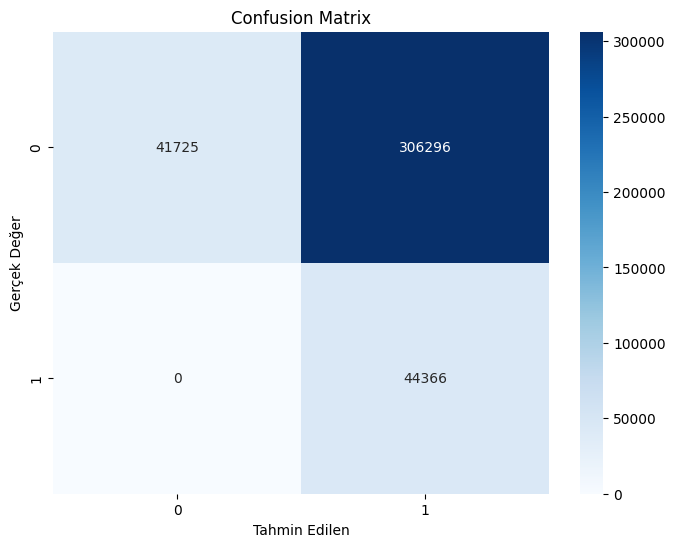

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


df = pd.read_parquet('/content/drive/MyDrive/Xcandıs/dump7-fabr-381h.parquet', engine='pyarrow')

print(df['label'].nunique())

non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()

if non_numeric_cols:
    print(f"İşlenecek kategorik sütunlar: {non_numeric_cols}")
    label_encoders = {}
    for col in non_numeric_cols:
        if col != 'label':
            print(f"  {col} sütunu dönüştürülüyor...")
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            label_encoders[col] = le
else:
    print("İşlenecek kategorik sütun bulunamadı")


X = df.drop(['label'], axis=1)
y = df['label']

loaded_model = joblib.load('/content/drive/MyDrive/XCANDIS RAW/xgb_model_binary_v2.pkl')
print(type(loaded_model))
booster = loaded_model.get_booster()
expected_features = booster.feature_names

booster = loaded_model.get_booster()
expected_features = booster.feature_names

X_aligned = X[expected_features]
predictions = loaded_model.predict(X_aligned)

print("\n--- Classification Report ---")
print(classification_report(y, predictions))

print("\n--- Accuracy ---")
print(f"Test Accuracy: {accuracy_score(y, predictions):.4f}")

print("\n--- Confusion Matrix ---")
conf_matrix = confusion_matrix(y, predictions)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.title('Confusion Matrix')
plt.show()
